## Import Modules

In [15]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import platform
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

## Import MNIST datasets (Training and Test datasets)

In [16]:
mnist = tf.keras.datasets.mnist 
# 28x28 images of hand-written digits

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Dataset normalization

In [17]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 28, 28)
(10000, 28, 28)


## Save image parameters to the constants that we will use later for data re-shaping and for model traning.

In [18]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_norm.shape
IMAGE_CHANNELS = 1

x_train_reshape_norm = x_train_norm.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_reshape_norm = x_test_norm.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

print(x_train_reshape_norm.shape)
print(x_test_reshape_norm.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Build the CNN Model #1 (Change the Convolution2D Initializer)

In [19]:
# CNN model
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.TruncatedNormal()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
))

model.add(tf.keras.layers.Conv2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.TruncatedNormal()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print("\n\nModel Summary")
model.summary()

# Train the model
print("\n\nModel Training")
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_reshape_norm,
    y_train,epochs=10,
    validation_data=(x_test_reshape_norm, y_test), 
    callbacks=[tensorboard_callback]
)

# Training evaluation
print("\n\nTraining evaluation")
train_loss, train_acc = model.evaluate(x_train_reshape_norm, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_acc)

# Testing evaluation
print("\n\nTesting evaluation")
val_loss,val_acc=model.evaluate(x_test_reshape_norm,y_test)
print('Testing loss: ', val_loss)
print('Testing accuracy: ', val_acc)

#Saving the model
model.save("MNIST_0.78%_PaoTsung_MohamadBagasSetiawan.h5")



Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12

Loss


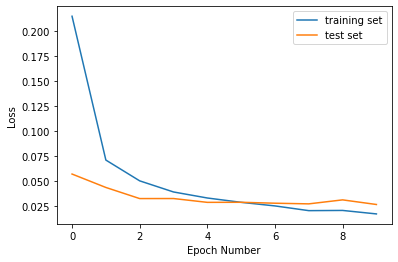

In [20]:
# Plot Loss
print("Loss")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

Accuracy


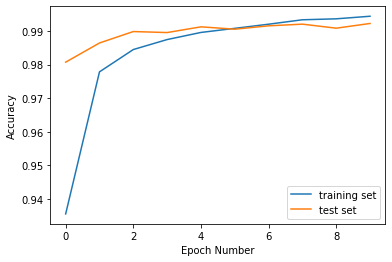

In [21]:
# Plot Accuracy
print("Accuracy")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

# Reference

* https://kknews.cc/zh-tw/tech/lj3yjee.html
* https://ithelp.ithome.com.tw/articles/10191725
* https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb#scrollTo=oq7PTGL1JNmF